# Exercise 4: Data cleaning and organising using R

## Contents

- 1. Introduction
    - Reminder: What are we trying to do?
    - Overview of the data sources
- 2. Importing packages in R
    - The tidyverse and dplyr
    - The importance of the pipe (and function chaining)!
- 2. Reading our data
    - The readr package
    - More on delimiters
    - Tools for examining our data
    - Sorting our data with arrange()
- 3. Data cleaning 
    - Removing variables (columns) with select()
    - Renaming variables with rename()
    - Removing observations (rows) with filter()
- 4. Data Manipulation
    - Introduction
    - Checking variables are unique with distinct()
    - Bring datasets together with full_join()
    - Aggregating data with group_by() and summarize()
    - Changing variable type (between numeric and factor)
    - Adding new variables with mutate()
- 5. Conclusion

## 1. Introduction

So far, we have managed to assemble our tobbaco register data using web-scraping and some programming in python. Now it is time to switch back to thinking about our actual research question and how we intend to use our data to this question. We will do this using the software "R". This is partly because you have already used this already (in "quantitative methods") but alos because "R" is generally considered the better software for the specific task of data manipulation and analysis rather than python which is more of a general purpose programming language.

### Reminder: What are we trying to do

If you remember, our overall purpose is to imagine that we undertaking a research project where we are interested in finding out if there is a relationship between the area-level availabillity of tobacco products and area-level measures of health. In other words, an analysis very similar to this one:

https://tobaccocontrol.bmj.com/content/tobaccocontrol/25/1/75.full.pdf

only using area-level data rather than individual level data. We have already done the first part; we have gathered our "exposure" data, the numbers of tobacco retailers in postcodes across Scotland. Now we need to firstly assemble our other data sources and then edit and clean these so that at the end we have one final dataset that we can use for our analysis. That is what we are going to do today. In the next practical we will then focus on actually analysing this data.

The areas that we are going to focus on are known as "datazones". These are the smallest geographical units at which data will be released to the public in Scotland. Datazones are groups of 2011 Census output areas which have populations of around 500 to 1,000 residents.  There are 6,976 2011 Data Zones in Scotland. You can have a look at these in more detail here: https://simd.scot/#/simd2020/BTTTFTT/9/-4.0000/55.9000/

The important thing is that datazones are larger than individual postcodes so we have to do some manipulation to our data to format in the way that we want. When we have completed this practical, we will have a dataset whcih will consist of an observation (or row) per datazone (so 6,976 row in total) with each row having a number of variables e.g. tobacco retailers, smoking rate, level of deprivation etc. Something like this...

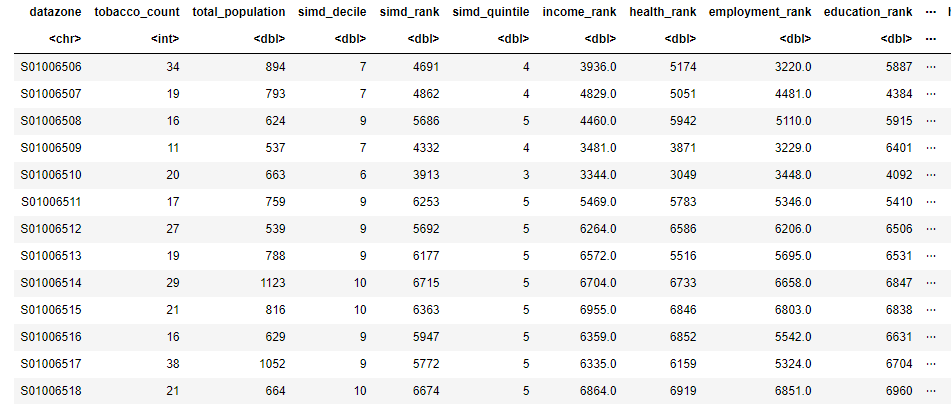

### Overview of the data sources

In order to assemble this data we are going to be using data from a number of diferent sources. If you look at the "Week 3" folder you will see them all listed. Lets go through them one by one.

#### TobaccoRegister.csv
This is the data we have just created. It contain the address and postcode of all tobacco retailers in Scotland. We will use this to calculate our "exposure" variable i.e. the thing we think will be associated with smoking behaviour. It does not contain a datazone variable so we will need to get this from somewhere else...

#### ScottishPostcodes.txt
This file is what we call a look-up file. It is so called because we use it to "look-up" other information. In this case it contains all of the postcodes in scotland along with corresponding codes for the datazone that the postcode falls within. We will use this to connect our tobacco data (which only has postcodes) to datazones. This data came from this page: https://www.nrscotland.gov.uk/statistics-and-data/geography/our-products/scottish-postcode-directory/2020-2

#### simd2020.csv
This data contains all of the variables from the Scottish Index of Multiple Deprivation (SIMD). The SIMD contains lots of infoirmatin at the datazone level including levels of health, unemployment, crime and others in each datazone. It also contains infomration about things like the total population in each datazone. This dataset will be used to bring in detailed background informaiton about the datazones.

#### urban_rural.csv
This dataset contains some additional useful information about the datazones; whether they are urban or rural or not. This dataset came from here: https://www2.gov.scot/Publications/2018/03/6040/downloads

#### smoking-at-booking.csv
this dataset contains smoking rates among pregnant women per datazone for different years (2012-2014, 2013-2015 etc). This dataset will provide our "outcome" data. This is the only population-scale dataset on smoking behaviours that is available (the other sources we might use are social surveys and based on a sample). This data came from here (note it may take a while to load): https://statistics.gov.scot/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fsmoking-at-booking

## 2. Importing packages in R

### The tidyverse and dplyr
Much like when using python, R consists of lots and lots of different ad-on packages that we need to import into our R session (the same as we did with beautiful soup). We dod this using the `library()` command. The package we are going to be using for all of the tasl is called the `tidyverse` which is a collection of packages written by someone called Hadley Wickham. The `tidyverse` is a particular implementation ofthe R language and is generally accepted as the easiest when learining data science approaches for the first time. More info on the tidyverse here: https://www.tidyverse.org/

Much of what we are going to be doing is written up in this book:

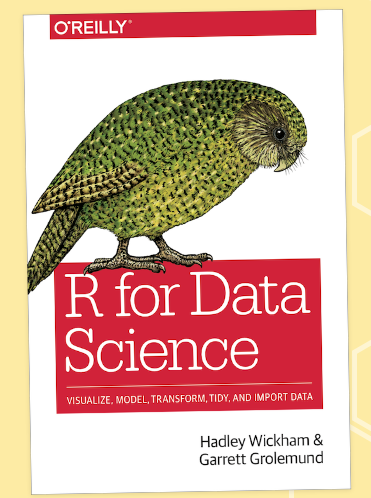

Which is very helpfully freely available online here: https://r4ds.had.co.nz/

It is definitly worth referring to as you learn these techniques! Within the `tidyverse` package it is the `dplyr` set of commands that we are going to use the most today. More info on `dplyr` here: https://dplyr.tidyverse.org/ 

So let's go ahead and load the packages we need (note the use of `#` to denote a `comment` in R which is the same as within python).

In [215]:
#Load the tidyverse collection of packages
library(tidyverse)

### The importance of the pipe (and function chaining)!
The first thing I want to talk about before we get started is to note a really important aspect pf R programming in the `tidyverse` and that is the use of what is called a `pipe operator` which in code is represented by `%>%`. Remember when using python we talked about using `function chaining` and how complex it can be in python? Well in R it is much easier because of this `%>%` operator. It basically makes out code easier to read by focusing on the transformations, not what’s being transformed. You will see the `%>%` symbol a lot throughout this practical and its advantages will become clearer as we work through but for now I just wanted to highlight what this symbol is so it doesnt look too confusing.

## 3. Reading our data

### The readr package
The first task we have is to read in all of our datasets. Let's start by making sure R knows where to look for our files. 

The code below does two things, firstly it `sets the working directory` hence `setwd` which means that R is now pointing to the directory where our files are stored. The next line then just lists all of the files in the folder so we can see we are in the right place. 

In [216]:
#List the files in the working directory
setwd('/home/jovyan/Archives-Data-Science-Workshop.git/Week 3/')
list.files()

[1] "Exercise 4 Data cleaning and wrangling using R.ipynb"
[2] "ScottishPostcodes.txt"                               
[3] "SIMD_domains.csv"                                    
[4] "simd2020.csv"                                        
[5] "smoking-at-booking.csv"                              
[6] "TobaccoRegister.csv"                                 
[7] "urban_rural.csv"

Now we need to tell R to read in the datafiles into different objects so we can worh with them. We do this using the `read_csv()` function from the `tidyverse` as below...

In [217]:
#Read all ofthe files into objects
smoking <- read_csv('smoking-at-booking.csv')
simd <- read_csv('simd2020.csv')    
postcodes <- read_csv('ScottishPostcodes.txt')
urban_rural <- read_csv('urban_rural.csv')

Parsed with column specification:
cols(
  datazone = col_character(),
  AreaName = col_character(),
  `12_14` = col_double(),
  `13_15` = col_double(),
  `14_16` = col_double(),
  `15_17` = col_double(),
  `16_18` = col_double(),
  `17_19` = col_double()
)

Parsed with column specification:
cols(
  .default = col_double(),
  Data_Zone = col_character(),
  Intermediate_Zone = col_character(),
  Council_area = col_character(),
  income_rate = col_character(),
  employment_rate = col_character(),
  DEPRESS = col_character(),
  LBWT = col_character(),
  Attendance = col_character(),
  Attainment = col_character(),
  not_participating = col_character(),
  University = col_character(),
  crime_count = col_character(),
  crime_rate = col_character(),
  overcrowded_rate = col_character(),
  nocentralheating_rate = col_character(),
  broadband = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character(),
  GridReference

There are a couple of things to note about this code. The first thing you'll notice is that it looks very similar to python code in that we assiging the results of function to a new object. For example `smoking <- read_csv('smoking-at-booking.csv')` applies the function `read_csv` to the filename `smoking-at-booking.csv` and puts the result into an object called `smoking`. The difference of course that instead of an `=` sign as we would use in python, R instead uses `<-`. This is a key difference...whenever you assign something in R you do so with a `<-` and not an `=`.

### More on delimiters
All of our files are delimited by a `,` apart from our `TobaccoRegister.csv` data which as we know uses a `|` instead. Hence we also add the `, delim="|"` part to this command. If we leave this out, R assumes the files are delimited by a `,` by default. So, the full command for the retailer data is below...

In [218]:
#This one is special because of the delim
tobaccoregister <- read_delim('TobaccoRegister.csv', delim="|")

Parsed with column specification:
cols(
  `Date of Query` = col_character(),
  `Time of Query` = col_time(format = ""),
  `Premises Name` = col_character(),
  Address = col_character(),
  postcode = col_character(),
  `Local Authorities` = col_character(),
  `Business Type` = col_character(),
  `Products Sold` = col_character(),
  `Company Name` = col_character(),
  Status = col_character()
)



### Tools for examining our data
Now we have our data imported into R we can have a look at it with some useful commands.

The first of these is the `dim` function which returns the `dimensions` of our datasets...

In [219]:
dim(smoking)
dim(simd)
dim(postcodes)
dim(urban_rural)
dim(tobaccoregister)

[1] 6976    8

[1] 6976   49

[1] 188654     56

[1] 6976    5

[1] 13333    10

You can see that the number of observations is on the left and the number of columns is the number on the right. You can see the datasets that relate to `datazones` as they each have `6976` observations. The remaining datasets are the postcode files which have many more rows of data.

Another useful tool is the `head()` function, which allows us to examine the top 6 rows of data and column names...

In [220]:
#Examine the first few rows of each datafile
head(smoking)
head(tobaccoregister)
head(urban_rural)

datazone,AreaName,12_14,13_15,14_16,15_17,16_18,17_19
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01009308,Abbey Parks North,28.57,18.18,14.29,8.33,9.09,12.50
S01009309,Abbey Parks South and Brucefield North West,27.27,22.58,12.50,8.33,10.34,10.34
S01008686,Abbeyhill - 01,18.42,15.38,16.67,16.67,29.41,27.27
S01008687,Abbeyhill - 02,4.88,6.90,4.76,11.76,6.25,9.52
S01008688,Abbeyhill - 03,9.52,10.53,11.11,5.00,7.14,0.00
S01009340,Abbeyview Central,42.86,35.71,38.89,26.32,27.27,28.00


Date of Query,Time of Query,Premises Name,Address,postcode,Local Authorities,Business Type,Products Sold,Company Name,Status
<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10/18/2020,01:00:14,BAR B Q KING,"31 Whytescauseway,",KY1 1XF,Fife,Other Catering,Tobacco And Nicotine Vapour Products,BAR B Q KING,Active
10/18/2020,01:00:14,Birkmyre Store,"15 Birkmyre Avenue,",PA14 5AR,Inverclyde,Convenience Store,Tobacco And Nicotine Vapour Products,Birkmyre store,Active
10/18/2020,01:00:14,BP Burnbank,"British Petroleum Co plc, Service Station, 91 Burnbank Road",ML3 9AN,South Lanarkshire,Forecourt Garage,Tobacco And Nicotine Vapour Products,Roshan Francisxavier,Active
10/18/2020,01:00:14,UR7 LTD,"Fone Republic, 276B High Street",EH49 7ER,West Lothian,Other Retail,Tobacco And Nicotine Vapour Products,UR7 LTD,Active
10/18/2020,01:00:14,"Wrap Bar ,Kings Buildings Shop Ltd","Kings Building, University of Edinburgh, Mary Bruck Building, Colin Maclaurin Road , Edinburgh , EH9 3DW",EH9 3DW,Edinburgh City,Other Retail,Tobacco And Nicotine Vapour Products,Edinburgh University Students Assosciation,Active
10/18/2020,01:00:14,(Keystore) G&M Newsagents,"281-283 High Street, Leslie",KY6 3AX,Fife,Confectionary / Tobacconist / Newsagents,Tobacco Only,G&M Newsagents,Inactive


Datazone2011,UR8_2013_2014,UR6_2013_2014,UR3_2013_2014,UR2_2013_2014
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
S01006506,3,3,1,1
S01006507,3,3,1,1
S01006508,3,3,1,1
S01006509,3,3,1,1
S01006510,3,3,1,1
S01006511,3,3,1,1


we can also specify how many rows we want with `n=...`...

In [221]:
head(simd, n=30)
head(postcodes, n=10)

Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,⋯,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
S01006506,Culter,Aberdeen City,894,580,4691,68,14,7,4,⋯,2.540103,3.074295,1.616239,2.615747,1.544260,9.930833,8.863589,5.856135,6.023406,11%
S01006507,Culter,Aberdeen City,793,470,4862,70,14,7,4,⋯,3.915072,4.309812,2.555858,3.646697,2.849656,11.042816,9.978272,7.515000,7.926029,1%
S01006508,Culter,Aberdeen City,624,461,5686,82,17,9,5,⋯,3.323025,3.784549,1.440991,3.247325,2.062255,10.616768,8.620700,4.321493,5.770910,1%
S01006509,Culter,Aberdeen City,537,307,4332,63,13,7,4,⋯,2.622991,2.778026,2.620681,1.936908,2.160142,10.036471,7.935112,8.433328,8.329819,11%
S01006510,Culter,Aberdeen City,663,415,3913,57,12,6,3,⋯,2.115004,2.358335,2.408416,1.845672,1.784635,9.650000,5.568964,6.966429,6.632609,0%
S01006511,Culter,Aberdeen City,759,453,6253,90,18,9,5,⋯,1.516911,1.769581,3.227433,2.517457,2.593053,8.614008,4.934953,7.668555,7.340100,5%
S01006512,Culter,Aberdeen City,539,345,5692,82,17,9,5,⋯,5.365872,5.776137,3.909220,5.374184,4.277914,12.215238,19.011859,16.256657,16.960183,54%
S01006513,"Cults, Bieldside and Milltimber West",Aberdeen City,788,406,6177,89,18,9,5,⋯,3.573032,4.322546,5.524487,1.945431,4.910961,6.262143,11.269491,10.982774,11.099344,3%
S01006514,"Cults, Bieldside and Milltimber West",Aberdeen City,1123,709,6715,97,20,10,5,⋯,2.722303,3.517337,4.693965,2.889620,4.061292,7.039018,9.742910,10.002157,9.730058,14%


Postcode,PostcodeDistrict,PostcodeSector,DateOfIntroduction,DateOfDeletion,GridReferenceEasting,GridReferenceNorthing,Latitude,Longitude,SplitIndicator,⋯,LocalGovernmentDistrict1991Code,NationalPark2010Code,RegistrationDistrict2007Code,ROACommunityPlanningPartnership2006Code,ROALocal2006Code,StrategicDevelopmentPlanningArea2013Code,TravelToWorkArea2011Code,UrbanRural6Fold2013_2014Code,UrbanRural8Fold2013_2014Code,GridLinkIndicator
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
EH9 2LR,EH9,EH9 2,1/8/1973 00:00:00,NA,326057,671391,55.92993,-3.183601,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2HY,EH9,EH9 2,1/8/1973 00:00:00,NA,325590,671331,55.92932,-3.191058,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2JF,EH9,EH9 2,1/8/1973 00:00:00,NA,325927,671917,55.93464,-3.185826,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2JG,EH9,EH9 2,1/8/1973 00:00:00,NA,325985,671937,55.93483,-3.184903,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2JH,EH9,EH9 2,1/8/1973 00:00:00,NA,326044,671869,55.93423,-3.183940,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2JX,EH9,EH9 2,1/8/1973 00:00:00,NA,326086,671993,55.93535,-3.183302,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2JY,EH9,EH9 2,1/9/1986 00:00:00,NA,325695,671676,55.93244,-3.189473,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y
EH9 2LA,EH9,EH9 2,1/2/1976 00:00:00,1/11/1991 00:00:00,325769,671340,55.92943,-3.188196,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,N
EH9 2LL,EH9,EH9 2,1/8/1973 00:00:00,NA,326241,671597,55.93181,-3.180713,N,⋯,29,NA,S12000036,NA,NA,S11000003,S22000059,1,1,Y


This command is useful but if the number of columns is large it will cut off some of them. 

Instead, to list all of the column names we can use `colnames()`...

In [222]:
#Look at the column headers for each file
colnames(postcodes)
colnames(smoking)
colnames(simd)
colnames(tobaccoregister)
colnames(urban_rural)

[1] "Postcode"                                  
 [2] "PostcodeDistrict"                          
 [3] "PostcodeSector"                            
 [4] "DateOfIntroduction"                        
 [5] "DateOfDeletion"                            
 [6] "GridReferenceEasting"                      
 [7] "GridReferenceNorthing"                     
 [8] "Latitude"                                  
 [9] "Longitude"                                 
[10] "SplitIndicator"                            
[11] "CouncilArea2011Code"                       
[12] "UKParliamentaryConstituency2005Code"       
[13] "ScottishParliamentaryRegion2014Code"       
[14] "ScottishParliamentaryConstituency2014Code" 
[15] "ElectoralWard2016Code"                     
[16] "HealthBoardArea2014Code"                   
[17] "HealthBoardArea2006Code"                   
[18] "HealthBoardArea1995Code"                   
[19] "IntegrationAuthority2016Code"              
[20] "OutputArea2011Code"                        
[21] "OutputArea2001Code"                        
[22] "OutputArea1991Code"                        
[23] "DataZone2011Code"                          
[24] "DataZone2001Code"                          
[25] "IntermediateZone2011Code"                  
[26] "IntermediateZone2001Code"                  
[27] "CensusHouseholdCount2011"                  
[28] "CensusPopulationCount2011"                 
[29] "CensusHouseholdCount2001"                  
[30] "CensusPopulationCount2001"                 
[31] "CensusHouseholdCount1991"                  
[32] "CensusPopulationCount1991"                 
[33] "ScottishIndexOfMultipleDeprivation2016Rank"
[34] "LAU2011Level1Code"                         
[35] "LAU2011Level2Code"                         
[36] "NUTS2013Level2Code"                        
[37] "NUTS2013Level3Code"                        
[38] "Locality2012Code"                          
[39] "Locality2001Code"                          
[40] "Locality1991Code"                          
[41] "Settlement2012Code"                        
[42] "Settlement2001Code"                        
[43] "CivilParish1930Code"                       
[44] "EnterpriseRegion2008Code"                  
[45] "Islands2016Code"                           
[46] "LocalGovernmentDistrict1995Code"           
[47] "LocalGovernmentDistrict1991Code"           
[48] "NationalPark2010Code"                      
[49] "RegistrationDistrict2007Code"              
[50] "ROACommunityPlanningPartnership2006Code"   
[51] "ROALocal2006Code"                          
[52] "StrategicDevelopmentPlanningArea2013Code"  
[53] "TravelToWorkArea2011Code"                  
[54] "UrbanRural6Fold2013_2014Code"              
[55] "UrbanRural8Fold2013_2014Code"              
[56] "GridLinkIndicator"

[1] "datazone" "AreaName" "12_14"    "13_15"    "14_16"    "15_17"    "16_18"   
[8] "17_19"

[1] "Data_Zone"                       "Intermediate_Zone"              
 [3] "Council_area"                    "Total_population"               
 [5] "Working_Age_population"          "SIMD2020v2_Rank"                
 [7] "SIMD_2020v2_Percentile"          "SIMD2020v2_Vigintile"           
 [9] "SIMD2020v2_Decile"               "SIMD2020v2_Quintile"            
[11] "SIMD2020v2_Income_Domain_Rank"   "SIMD2020_Employment_Domain_Rank"
[13] "SIMD2020_Health_Domain_Rank"     "SIMD2020_Education_Domain_Rank" 
[15] "SIMD2020_Access_Domain_Rank"     "SIMD2020_Crime_Domain_Rank"     
[17] "SIMD2020_Housing_Domain_Rank"    "income_rate"                    
[19] "income_count"                    "employment_rate"                
[21] "employment_count"                "CIF"                            
[23] "ALCOHOL"                         "DRUG"                           
[25] "SMR"                             "DEPRESS"                        
[27] "LBWT"                            "EMERG"                          
[29] "Attendance"                      "Attainment"                     
[31] "no_qualifications"               "not_participating"              
[33] "University"                      "crime_count"                    
[35] "crime_rate"                      "overcrowded_count"              
[37] "nocentralheating_count"          "overcrowded_rate"               
[39] "nocentralheating_rate"           "drive_petrol"                   
[41] "drive_GP"                        "drive_post"                     
[43] "drive_primary"                   "drive_retail"                   
[45] "drive_secondary"                 "PT_GP"                          
[47] "PT_post"                         "PT_retail"                      
[49] "broadband"

[1] "Date of Query"     "Time of Query"     "Premises Name"    
 [4] "Address"           "postcode"          "Local Authorities"
 [7] "Business Type"     "Products Sold"     "Company Name"     
[10] "Status"

[1] "Datazone2011"  "UR8_2013_2014" "UR6_2013_2014" "UR3_2013_2014"
[5] "UR2_2013_2014"

Now we can see that we have a lot of variables, many of them terribly named and many that we do not need. Our next task is to clean all of this out.

Before we do however, one last useful tool is the `arrange()` function which we can use to sort our data. 

### Sorting our data with arrange()

To do this we first specify the object we want to sort and then the variable we wish to sort by. So below we sort our `simd` dataset according to the `Total_population` variable...  

In [223]:
arrange(simd, Total_population)

Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,⋯,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
S01010206,Petershill,Glasgow City,0,0,4172,60,12,6,3,⋯,2.642133,4.191610,4.168400,3.658333,5.475810,5.219167,7.309779,12.673954,13.543094,NA
S01010226,Sighthill,Glasgow City,0,0,6058,87,18,9,5,⋯,2.405456,2.743327,2.529700,2.998125,2.600766,2.918889,7.932647,10.398539,9.510423,NA
S01010227,Sighthill,Glasgow City,0,0,5090,73,15,8,4,⋯,3.050690,3.570607,3.872514,4.413125,3.456189,4.268750,11.543215,13.939758,12.173728,0%
S01008533,Comiston and Swanston,City of Edinburgh,258,188,4018,58,12,6,3,⋯,2.154085,3.219085,2.353880,3.922143,7.257318,5.580147,8.726594,6.825574,16.324199,0%
S01010106,Easterhouse East,Glasgow City,260,161,1021,15,3,2,1,⋯,3.683614,3.962517,2.454067,2.195541,4.002913,3.169494,8.235385,7.862070,9.786612,0%
S01010207,Petershill,Glasgow City,288,165,18,1,1,1,1,⋯,1.640431,2.732574,2.839573,2.205170,3.875684,4.269116,6.142442,11.293914,11.585257,0%
S01013122,IZ01,West Dunbartonshire,311,189,704,11,3,2,1,⋯,1.222705,1.817174,3.805293,2.493242,4.942471,7.705799,4.514038,8.210184,12.469891,0%
S01010309,Keppochhill,Glasgow City,318,190,1006,15,3,2,1,⋯,2.995591,1.738419,2.589236,3.443511,2.612965,5.865417,7.854081,8.263986,8.507220,0%
S01008091,Bishopbriggs North and Kenmure,East Dunbartonshire,337,195,5535,80,16,8,4,⋯,3.814435,5.284812,3.892312,2.235000,4.612312,7.588548,15.319357,13.146857,13.582221,0%


We can also do this in descending order by using the `desc` function within the `arrange` function...

In [224]:
arrange(simd, desc(Total_population))

Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,⋯,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
S01008425,Currie West,City of Edinburgh,3847,3423,6483,93,19,10,5,⋯,4.609475,3.408249,4.477314,3.339362,5.874683,4.677062,9.390757,13.444331,20.616334,19%
S01013401,"Bathgate, Wester Inch and Inchcross",West Lothian,3260,2202,5094,74,15,8,4,⋯,3.395000,3.326335,5.216447,3.700016,4.965578,5.658533,9.922876,14.673516,13.077009,2%
S01007691,Perth Road,Dundee City,2856,2714,3886,56,12,6,3,⋯,2.495609,2.067195,2.276351,2.773276,2.881829,5.356090,5.871184,5.791808,8.080476,4%
S01007378,Garelochhead,Argyll and Bute,2804,2605,6326,91,19,10,5,⋯,3.580075,4.408687,3.326023,4.282955,13.467984,14.068146,7.194070,5.839231,21.863133,43%
S01008328,Crookfur and Fruin,East Renfrewshire,2656,1539,4903,71,15,8,4,⋯,3.862346,2.889982,2.939138,3.211354,4.648416,5.398072,12.595823,15.178197,22.087010,14%
S01010991,Newbattle and Dalhousie,Midlothian,2559,1598,4959,72,15,8,4,⋯,4.392844,4.193375,5.722204,2.323950,3.369015,6.845314,10.226606,19.885153,7.872992,7%
S01010260,City Centre East,Glasgow City,2544,2361,3550,51,11,6,3,⋯,4.881131,3.830222,3.038756,3.775737,4.359748,5.143711,9.285667,8.057680,10.490248,17%
S01012820,"Halfway, Hallside and Drumsagard",South Lanarkshire,2509,1651,5336,77,16,8,4,⋯,4.732661,4.865467,2.956224,2.634541,6.816609,8.867478,14.648491,13.456891,20.659630,22%
S01008144,Rosebank and Waterside,East Dunbartonshire,2459,1572,5823,84,17,9,5,⋯,4.178986,5.866352,3.651258,6.349911,6.851071,6.052748,18.684707,14.279835,19.270328,6%


And we can sort by multiple variables (i.e. sort within other variables...) 

In [225]:
arrange(simd, SIMD2020v2_Decile, Total_population)

Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,⋯,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
S01010207,Petershill,Glasgow City,288,165,18,1,1,1,1,⋯,1.640431,2.7325739,2.839573,2.205170,3.875684,4.269116,6.142442,11.293914,11.585257,0%
S01010895,Greenock Town Centre and East Central,Inverclyde,367,238,218,4,1,1,1,⋯,3.059696,5.0078102,2.537068,2.274096,5.152178,5.730854,11.117470,4.647835,11.969976,0%
S01011235,Stevenston Ardeer,North Ayrshire,382,247,198,3,1,1,1,⋯,3.027526,2.7067383,2.709577,1.741049,2.810020,4.268913,7.182357,7.734974,9.034974,0%
S01008787,Great Junction Street,City of Edinburgh,392,251,11,1,1,1,1,⋯,3.579947,1.6183289,1.867447,2.761259,1.761711,4.438482,4.510829,3.535829,4.358275,0%
S01010130,Barlanark,Glasgow City,408,249,546,8,2,1,1,⋯,4.247668,3.4048498,1.431094,1.818048,5.070739,5.230064,12.764363,6.675919,14.184273,0%
S01011216,Irvine Castlepark North,North Ayrshire,414,284,319,5,1,1,1,⋯,1.757593,2.0561618,1.529103,3.868175,5.720830,2.932444,8.591359,5.676037,20.946712,0%
S01010105,Easterhouse East,Glasgow City,424,302,287,5,1,1,1,⋯,4.426718,4.3131219,1.574421,1.930686,4.350622,3.347273,9.392525,6.212833,10.427204,0%
S01007554,Upper Nithsdale,Dumfries and Galloway,429,245,478,7,2,1,1,⋯,5.853494,1.7992184,1.135908,1.900103,6.897241,6.453846,6.707885,3.181954,11.603011,0%
S01012161,Renfrew West,Renfrewshire,431,268,488,7,2,1,1,⋯,2.308753,5.9550438,1.900832,3.572730,1.554081,5.270648,7.805760,5.069278,4.206225,0%


## 3. Data cleaning

### Removing variables (columns) with select()
The first stage of our data cleaning is to remove excess variables that we dont need. this is often the first thing we do because it makes our datafiles much easier to manage and less cumbersome. If you are using big secondary data sources for your dissertations these may have huge numbers of variables which you dont need so this will be very useful. 

We do this using the `select()` function. Let's start with the `smoking` dataset. Remember this contains smoking rates among pregnant women for all of the datazones in scotland for different years. ?for our analysis we are only interested in the latest years data which is 2017-2019. So our first task is to remove all of the other variables (apart from the datazone).

The code for this is pretty stratightforward. We start with the `select` function and the nwe supply the arguments to this function, starting with the name of the dataset `smoking`, followed by the name of variables we want to keep separated by a comma. We then reassign this new object, in this case to the same name `smoking`. <b>NOTE: this overwrites and replaces the previous object which is fine for the exercise but you may want to create a new object when you do this for real, otherwise you would need to re-import the data if you make a mistake.</b>

In [226]:
#Trim smoking file
smoking <- select(smoking, datazone, '17_19')
head(smoking)

datazone,17_19
<chr>,<dbl>
S01009308,12.50
S01009309,10.34
S01008686,27.27
S01008687,9.52
S01008688,0.00
S01009340,28.00


Note that because the variable `17_19` starts with a number we need to use quote marks to denote it as a string.

Let's do the same with the `postcodes` file and the `urban_rural` file. We only need the `Postcode, DataZone2011Code, DateOfIntroduction, DateOfDeletionpostcode` and `Datazone2001`,`UR6_2013_2014` variables from these files respectively. 

In [227]:
#Remove variables we dont need from the postcode file
postcodes <- select(postcodes, Postcode, DataZone2011Code, DateOfIntroduction, DateOfDeletion)
head(postcodes)

urban_rural <- select(urban_rural, Datazone2011, UR6_2013_2014)
head(urban_rural)

Postcode,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<chr>,<chr>,<chr>
EH9 2LR,S01008589,1/8/1973 00:00:00,NA
EH9 2HY,S01008624,1/8/1973 00:00:00,NA
EH9 2JF,S01008610,1/8/1973 00:00:00,NA
EH9 2JG,S01008610,1/8/1973 00:00:00,NA
EH9 2JH,S01008610,1/8/1973 00:00:00,NA
EH9 2JX,S01008607,1/8/1973 00:00:00,NA


Datazone2011,UR6_2013_2014
<chr>,<dbl>
S01006506,3
S01006507,3
S01006508,3
S01006509,3
S01006510,3
S01006511,3


We need to remove other variables from other datasets but I want to use these remaining datasets to show how we can combine tasks using the `%>%` symbol a bit later on so will leave these for now. 

### Removing observations (rows) with filter()
As well as removing `variables` (columns) that we dont need. We can also remove observations that are not needed. A good example of this is the postodes file because it contains records of postcodes that are no longer in active use. These postcodes are not of use to us because they wont be matched to a tobacco retailer postcode. We can filter these observations by using the `DateOfIntroduction` and `DateOfDeletion` variables. Let's look at these variables:

In [228]:
head(postcodes %>% select(DateOfIntroduction,DateOfDeletion), n=100)

DateOfIntroduction,DateOfDeletion
<chr>,<chr>
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/9/1986 00:00:00,NA
1/2/1976 00:00:00,1/11/1991 00:00:00
1/8/1973 00:00:00,NA


You can see that some of the postcodes have a date in the `DateOfDeletion` column. These postcodes are the ones that have been deleted and so we can remove them. The other ones have an `NA` which means the value is missing (because they are still in use). We can filter on this variable to remove the deleted postcodes... 

In [229]:
postcodes <- filter(postcodes, is.na(DateOfDeletion))

#Display the new postcodes file
head(postcodes %>% select(DateOfIntroduction,DateOfDeletion), n=100)

DateOfIntroduction,DateOfDeletion
<chr>,<chr>
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA
1/9/1986 00:00:00,NA
1/8/1973 00:00:00,NA
1/8/1973 00:00:00,NA


The syntax is exactly the same as with `select`; we supply the name of the data object but in this case we also use `is.na(DateOfDeletion)` which basically means if the variable `DateOfDeletion` is missing a value (ie. it has `NA`) keep it and remove everything else.  

We can of course also `filter` based on the value of a variable. A good example of this is filtering out the tobacco retailers that are "inactive". We wont be needing these records in our analysis.

In [230]:
tobaccoregister <- filter(tobaccoregister, Status=="Active")

head(tobaccoregister, n=100)

Date of Query,Time of Query,Premises Name,Address,postcode,Local Authorities,Business Type,Products Sold,Company Name,Status
<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10/18/2020,01:00:14,BAR B Q KING,"31 Whytescauseway,",KY1 1XF,Fife,Other Catering,Tobacco And Nicotine Vapour Products,BAR B Q KING,Active
10/18/2020,01:00:14,Birkmyre Store,"15 Birkmyre Avenue,",PA14 5AR,Inverclyde,Convenience Store,Tobacco And Nicotine Vapour Products,Birkmyre store,Active
10/18/2020,01:00:14,BP Burnbank,"British Petroleum Co plc, Service Station, 91 Burnbank Road",ML3 9AN,South Lanarkshire,Forecourt Garage,Tobacco And Nicotine Vapour Products,Roshan Francisxavier,Active
10/18/2020,01:00:14,UR7 LTD,"Fone Republic, 276B High Street",EH49 7ER,West Lothian,Other Retail,Tobacco And Nicotine Vapour Products,UR7 LTD,Active
10/18/2020,01:00:14,"Wrap Bar ,Kings Buildings Shop Ltd","Kings Building, University of Edinburgh, Mary Bruck Building, Colin Maclaurin Road , Edinburgh , EH9 3DW",EH9 3DW,Edinburgh City,Other Retail,Tobacco And Nicotine Vapour Products,Edinburgh University Students Assosciation,Active
10/18/2020,01:00:14,@home,"72-76 Murraygate,",DD1 2BB,Dundee City,Supermarket and Other Retail Outlets,Nicotine Vapour Products Only,shery trading,Active
10/18/2020,01:00:14,1 Stop News,"366 Cumbernauld Road,",G31 3NQ,Glasgow City,Convenience Store,Tobacco Only,1 Stop News,Active
10/18/2020,01:00:14,10 Dollar Shake,"9 Knockothie Road,",AB41 9EG,Aberdeenshire,Other Catering,Tobacco Only,10 Dollar Shake,Active
10/18/2020,01:00:14,10 oclock shop,"23 glasgow road, wishaw",ML2 7PG,North Lanarkshire,Convenience Store,Tobacco And Nicotine Vapour Products,maukinfauld ltd,Active


### Renaming variables with rename()
As well as removing observations and variables, we may also want to rename some of the variables. Some of our datafiles have really clunky and cumbersome names which are difficult to manage. We cna change this with `rename()`.

You will be pleased to know that the syntax for this is exactly the same as before with `select()` and `filter()`. The only difference is we need to supply the new name for the variables we want rename. 

Let's look at the smoking file and look at how change the name of the variable `17_19` to `smoking_rate`...

In [231]:
smoking <- rename(smoking, smoking_rate = '17_19')
head(smoking)

datazone,smoking_rate
<chr>,<dbl>
S01009308,12.50
S01009309,10.34
S01008686,27.27
S01008687,9.52
S01008688,0.00
S01009340,28.00


The key thing to remember here is that the new variable name comes first, then the `=` sign and then the name of the variable you are changing.

Let's do the same with the `Postcode` variable in the `postcodes` file. It is always good practice to name your variables in lowercase letters so we'll change `Postcode` to `postcode`. We'll also change the name of the datazone variable in the urban_rural file while are at it as well.

In [232]:
#Rename postcode field
postcodes <- rename(postcodes, postcode = "Postcode")
urban_rural <- rename(urban_rural, datazone = "Datazone2011")
head(postcodes)
head(urban_rural)

postcode,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<chr>,<chr>,<chr>
EH9 2LR,S01008589,1/8/1973 00:00:00,NA
EH9 2HY,S01008624,1/8/1973 00:00:00,NA
EH9 2JF,S01008610,1/8/1973 00:00:00,NA
EH9 2JG,S01008610,1/8/1973 00:00:00,NA
EH9 2JH,S01008610,1/8/1973 00:00:00,NA
EH9 2JX,S01008607,1/8/1973 00:00:00,NA


datazone,UR6_2013_2014
<chr>,<dbl>
S01006506,3
S01006507,3
S01006508,3
S01006509,3
S01006510,3
S01006511,3


We can also rename multiple variables in one command. This is very useful for the `simd` file which has lots of variable names we need to change. We do this by just separating each variables renaming part with a comma e.g. `datazone = "Data_Zone", total_population = "Total_population"`.

But I want to introduce here why the `%>%` is so important. Because we are going to not just the variables renaming step here but also we are going to take the output from our rename function and pass it to a `select` function to select only these variables that we have renamed. By starting with `simd %>%` we are saying use the `simd` for every action that we take following this line. In other words first rename all of our variables, all the way to `drug_admissions` and then take the outputfrom command and then run the `select` function on this output and keep only the variables specified. The key here is that at no point is the `simd` object referenced in the rest of the command after the first `%>%` because the `%>%` symbol tells R to just keep using the object. This is a really powerful feature of the tidyverse becauae it allows us to easily "chain" together multiple and complex steps into one command.

In [233]:
#rename the variables in the simd file
simd <- simd %>%
    rename(datazone = "Data_Zone",
           total_population = "Total_population",
           simd_decile = "SIMD2020v2_Decile",
           simd_rank = "SIMD2020v2_Rank",
           simd_quintile = "SIMD2020v2_Quintile",
           income_rank = "SIMD2020v2_Income_Domain_Rank",
           health_rank = "SIMD2020_Health_Domain_Rank",
           employment_rank = "SIMD2020_Employment_Domain_Rank",
           education_rank = "SIMD2020_Education_Domain_Rank",
           access_rank = "SIMD2020_Access_Domain_Rank",
           crime_rank = "SIMD2020_Crime_Domain_Rank",
           housing_rank = "SIMD2020_Housing_Domain_Rank",
           alcohol_admissions = "ALCOHOL",
           drug_admissions = "DRUG") %>%
           select(datazone, total_population, simd_decile, simd_rank, simd_quintile, income_rank, health_rank, employment_rank,
           education_rank, access_rank, crime_rank, housing_rank, alcohol_admissions, drug_admissions)

#Display this new data
head(simd, n=20)

datazone,total_population,simd_decile,simd_rank,simd_quintile,income_rank,health_rank,employment_rank,education_rank,access_rank,crime_rank,housing_rank,alcohol_admissions,drug_admissions
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01006506,894,7,4691,4,3936.0,5174,3220.0,5887,4724,4664.0,3248.0,29,30
S01006507,793,7,4862,4,4829.0,5051,4481.0,4384,2148,4602.0,3486.0,130,126
S01006508,624,9,5686,5,4460.0,5942,5110.0,5915,4200,4563.5,5342.0,71,18
S01006509,537,7,4332,4,3481.0,3871,3229.0,6401,3982,5626.0,4394.5,80,28
S01006510,663,6,3913,3,3344.0,3049,3448.0,4092,5588,3885.0,3736.0,89,44
S01006511,759,9,6253,5,5469.0,5783,5346.0,5410,4974,6928.0,5924.0,55,0
S01006512,539,9,5692,5,6264.0,6586,6206.0,6506,547,4528.0,4815.0,29,0
S01006513,788,9,6177,5,6572.0,5516,5695.0,6531,1490,6928.0,6394.0,28,0
S01006514,1123,10,6715,5,6704.0,6733,6658.0,6847,1858,5507.0,6868.0,18,0


You can now see that we have completely re-worked our `simd` datafile into a much clearer and clean dataset.

## 4. Data Manipulation

### Introduction
Now we are really getting into our data cleaning. We have tidied up each of the individual files and are now ready for the really important step of merging them all together and creating any new variables we need. 

When doing data science type research, the situation we find ourselves in now (i.e. lots of different and separate tables) is very common. Collectively, multiple tables of data are called relational data because it is the relations, not just the individual datasets, that are important. In order for us to do our analysis we need to begin to draw these tables together into one table. At the moment the various different tables have different combinations of datazone and postcode variables and we need to use these two bits of information to join them together. Remember we want the final data to look something like the below image where each datazone has a count of the total number of tobacco retailers and lots of other information about each datazone.:

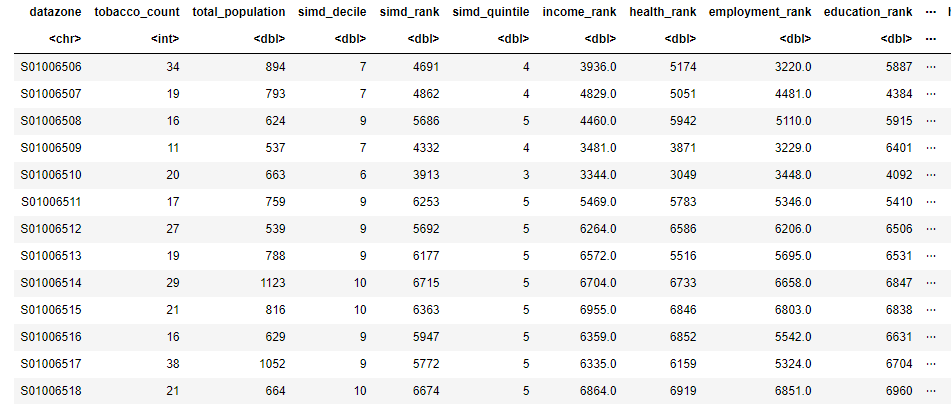

In order to do this we need to join datasets together. Before we get into this, we need to understand the concept of `keys`. A `key` is used to connect a pair of tables and is a variable (or set of variables) that uniquely identifies an observation. In simple cases as we have here, a single variable is sufficient to identify an observation. For example, each postcode area in Scotland is uniquely identified by its postcode value in each dataset. In some of the other tables, the `datazone` code is a unique `key`. In other words the datazone code `S01006511` in one data table corresponds to the same `S01006511` code in another table. Or the `EH9 2LR` postcode in one file corresponds to the same in another. We can use these `key` variables to link all of our data together into one file automatically!

However, the requirement for all of this to work is that the `key` variable needs to be unique in at least one of the tables to be joined. You can think through why this is.. its because otherwise there is no way to know which of the two identical postcodes or datazones we should connect to. The visual illustration below may help you see this (source: Wickham 2017):

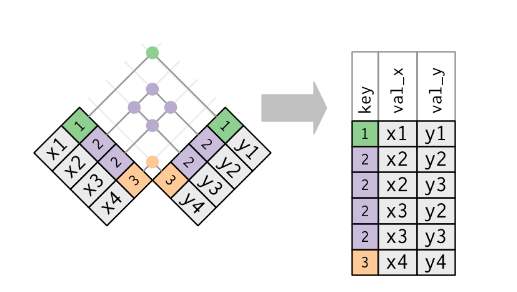

Hopefully this illustrates this a little more clearly. We call this situation `duplicate keys`.

So, taking all of this into account, we need to do our matching process as follows:

1. Firstly, because our `tobaccoretailers` table has no `datazone` code, we need to get it from another file which has both the datazone code AND a postcode value. We know that the `postcodes` table has both so if we join these two tables together using the `postcode` value we will get the `datazone` added to the tobacco retailer table. But before we do this this, we need to check that postcode is indeed unique in the postcodes file to avoid a duplicate keys situation.

2. Once we remove duplicate keys, we can then connect the `retailers` table to the `postcodes` table.

3. We then need to `aggregate` (in other words summarise) the tobacco retailer table so that it shows the number of retailers in each datazone. In other words, we *collapse* the tobacco retailer table into a row per datazone with a new variable which includes counts of retailers in each datazone (you can see this in the second column in the table above).

4. We then join all of the other tables (`urban_rural` and `simd`) to this `aggregated` table based on the datazone code as the `key`. 

### Step 1: Checking we have unique postcodes

We can use the `duplicated` function to check if we have any duplicated postcodes. This function returns either `TRUE` or `FALSE` if the observation is a duplicate. Here we use it to test each observation in the variable postcode in the table postcodes. We take the output and put it in a new object called `dupes`. If we run the `sum` function on this it will tell us if any of items in the `dupes` object are true. When we run it we see there are none (i.e. it returns a 0)

In [234]:
dupes <- duplicated(postcodes$postcode)
sum(dupes)

[1] 0

If we had found some duplicates, we could use the `distinct()` function to automatically remove them whilst keeping all of our variables...

In [235]:
postcodes <- distinct(postcodes, postcode, .keep_all = TRUE)
head(postcodes)

postcode,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<chr>,<chr>,<chr>
EH9 2LR,S01008589,1/8/1973 00:00:00,NA
EH9 2HY,S01008624,1/8/1973 00:00:00,NA
EH9 2JF,S01008610,1/8/1973 00:00:00,NA
EH9 2JG,S01008610,1/8/1973 00:00:00,NA
EH9 2JH,S01008610,1/8/1973 00:00:00,NA
EH9 2JX,S01008607,1/8/1973 00:00:00,NA


### Step 2: Bring datasets together with full_join() and check with anti_join()

Now that we know `postcode` uniquely identifies observations in the `postcodes` table we can go ahead with step 2 which is linking the `tobaccoretailer` table with the `postcodes` table. This will attach a `datazone` to our `tobaccoretailer` table.

We do this using the `full_join()` function and the syntax is actually pretty straightforward. We first supply the name of the table we are joining to (in this case `tobaccoregister`), then we specify the table that is being joined (in this case `postcodes`) and then finally we specify the variable that we want to use as the `key` in both tables using the `by = ...` syntax. 

<b>Note that we are using the `%>%` again here so we dont need to supply the first argument i.e. `tobaccoregister` as the first argument in the `full_join()` brackets</b> 

In [236]:
#Merge the tob register data with the postcode data
tobaccoregister <- tobaccoregister %>%
    full_join(postcodes, by = "postcode")

head(tobaccoregister)

Date of Query,Time of Query,Premises Name,Address,postcode,Local Authorities,Business Type,Products Sold,Company Name,Status,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10/18/2020,01:00:14,BAR B Q KING,"31 Whytescauseway,",KY1 1XF,Fife,Other Catering,Tobacco And Nicotine Vapour Products,BAR B Q KING,Active,S01009479,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,Birkmyre Store,"15 Birkmyre Avenue,",PA14 5AR,Inverclyde,Convenience Store,Tobacco And Nicotine Vapour Products,Birkmyre store,Active,S01010908,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,BP Burnbank,"British Petroleum Co plc, Service Station, 91 Burnbank Road",ML3 9AN,South Lanarkshire,Forecourt Garage,Tobacco And Nicotine Vapour Products,Roshan Francisxavier,Active,S01012792,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,UR7 LTD,"Fone Republic, 276B High Street",EH49 7ER,West Lothian,Other Retail,Tobacco And Nicotine Vapour Products,UR7 LTD,Active,S01013444,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,"Wrap Bar ,Kings Buildings Shop Ltd","Kings Building, University of Edinburgh, Mary Bruck Building, Colin Maclaurin Road , Edinburgh , EH9 3DW",EH9 3DW,Edinburgh City,Other Retail,Tobacco And Nicotine Vapour Products,Edinburgh University Students Assosciation,Active,S01008587,19/1/2015 00:00:00,NA
10/18/2020,01:00:14,@home,"72-76 Murraygate,",DD1 2BB,Dundee City,Supermarket and Other Retail Outlets,Nicotine Vapour Products Only,shery trading,Active,S01007711,1/8/1973 00:00:00,NA


If you scroll to the furtheest side of the new table above, you will see all of the the variables have now been added to the corresponding observation in the `tobaccoregister` table based on the matching postcode.

This is great, but one the key thing to consider when merging tables in this way is that we should always check to see if any of the retailers *didnt* get matched to a postcode in the `postcode` table. A useful way to do this is to use the `anti_join()` function. This does exactly the same thing as `full_join()` but instead looks at the observations that *don't* match and drops all of the other observations. In other words it gives us a list of the observations in the `tobaccoregister` table that couldnt be matched to a postcode. This is useful to help us figure out why this is the case.   

In [237]:
#Do an "anti-merge" to check things that didnt merge
anti_joined_file <- tobaccoregister %>%
    anti_join(postcodes, by = "postcode")

dim(anti_joined_file)
head(anti_joined_file)

[1] 484  13

Date of Query,Time of Query,Premises Name,Address,postcode,Local Authorities,Business Type,Products Sold,Company Name,Status,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10/18/2020,01:00:21,2 Victoria Buildings - Pharmacy,"2 Victoria Buildings`, Drumna",N63 6TU,Highland,Other Retail,Nicotine Vapour Products Only,Donal Bolger,Active,NA,NA,NA
10/18/2020,01:00:35,710 VACS LIMITED,"ECO HOUSE, WESTER GOURDIE IND. ESTATE, NOBEL ROAD",DD2 4XE,Dundee City,Other Retail,Tobacco And Nicotine Vapour Products,710 VACS LIMITED,Active,NA,NA,NA
10/18/2020,01:00:42,8352 - NAAFI Store Aramark,"RAF Kinloss, Forres",IV36 0KG,Moray,Convenience Store,Tobacco Only,Aramark,Active,NA,NA,NA
10/18/2020,01:00:55,A&B Partnership,"Unit 4, South Elgin Street",G81 1PL,West Dunbartonshire,Mobile Trade,Tobacco Only,A&B Partnership,Active,NA,NA,NA
10/18/2020,01:01:15,a1 supermarket,"2 woodhill road, bishopbriggs",G41 1JN,East Dunbartonshire,Off-Licence,Tobacco And Nicotine Vapour Products,a1 supermarket,Active,NA,NA,NA
10/18/2020,01:01:21,AA Superstore Ltd,"Daytoday, 43 Farm Road",G73 9DT,South Lanarkshire,Convenience Store,Tobacco And Nicotine Vapour Products,AA Superstore Ltd,Active,NA,NA,NA


In [238]:
dim(anti_joined_file)
head(anti_joined_file)

[1] 484  13

Date of Query,Time of Query,Premises Name,Address,postcode,Local Authorities,Business Type,Products Sold,Company Name,Status,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10/18/2020,01:00:21,2 Victoria Buildings - Pharmacy,"2 Victoria Buildings`, Drumna",N63 6TU,Highland,Other Retail,Nicotine Vapour Products Only,Donal Bolger,Active,NA,NA,NA
10/18/2020,01:00:35,710 VACS LIMITED,"ECO HOUSE, WESTER GOURDIE IND. ESTATE, NOBEL ROAD",DD2 4XE,Dundee City,Other Retail,Tobacco And Nicotine Vapour Products,710 VACS LIMITED,Active,NA,NA,NA
10/18/2020,01:00:42,8352 - NAAFI Store Aramark,"RAF Kinloss, Forres",IV36 0KG,Moray,Convenience Store,Tobacco Only,Aramark,Active,NA,NA,NA
10/18/2020,01:00:55,A&B Partnership,"Unit 4, South Elgin Street",G81 1PL,West Dunbartonshire,Mobile Trade,Tobacco Only,A&B Partnership,Active,NA,NA,NA
10/18/2020,01:01:15,a1 supermarket,"2 woodhill road, bishopbriggs",G41 1JN,East Dunbartonshire,Off-Licence,Tobacco And Nicotine Vapour Products,a1 supermarket,Active,NA,NA,NA
10/18/2020,01:01:21,AA Superstore Ltd,"Daytoday, 43 Farm Road",G73 9DT,South Lanarkshire,Convenience Store,Tobacco And Nicotine Vapour Products,AA Superstore Ltd,Active,NA,NA,NA


Using the `dim()` and `head()` functions on this new table we can see we have 484 unmatched cases. Try looking up some of these postcodes in google. You should see that they are all either dont exist or that they are no longer in use. For a proper project we might attempt to fix this problem but for the purposes of this exercise we will just ignore them.

Going back to our newly joined `tobaccoregister` data we, now need to remove these observations. If we run the below code we can see that all of these ummatched observations are still included. 

In [240]:
tobaccoregister %>% 
    filter(is.na(DataZone2011Code)) %>%
    select('Premises Name', DataZone2011Code)

Premises Name,DataZone2011Code
<chr>,<chr>
2 Victoria Buildings - Pharmacy,NA
710 VACS LIMITED,NA
8352 - NAAFI Store Aramark,NA
A&B Partnership,NA
a1 supermarket,NA
AA Superstore Ltd,NA
Abington M74 Motorway,NA
Ace Catering,NA
Ajays Corner Shop,NA


Lets remove these now and while we are at it let's also clean up other parts of the table including removing variables we dont need and renaming the remaining variables.

In [243]:
tobaccoregister %>% 
    filter(!is.na(DataZone2011Code)) %>%
    select(DataZone2011Code, postcode) %>%
    rename(datazone = "DataZone2011Code")

head(tobaccoregister)

datazone,postcode
<chr>,<chr>
S01009479,KY1 1XF
S01010908,PA14 5AR
S01012792,ML3 9AN
S01013444,EH49 7ER
S01008587,EH9 3DW
S01007711,DD1 2BB
S01010241,G31 3NQ
S01006970,AB41 9EG
S01011400,ML2 7PG


Date of Query,Time of Query,Premises Name,Address,postcode,Local Authorities,Business Type,Products Sold,Company Name,Status,DataZone2011Code,DateOfIntroduction,DateOfDeletion
<chr>,<time>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10/18/2020,01:00:14,BAR B Q KING,"31 Whytescauseway,",KY1 1XF,Fife,Other Catering,Tobacco And Nicotine Vapour Products,BAR B Q KING,Active,S01009479,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,Birkmyre Store,"15 Birkmyre Avenue,",PA14 5AR,Inverclyde,Convenience Store,Tobacco And Nicotine Vapour Products,Birkmyre store,Active,S01010908,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,BP Burnbank,"British Petroleum Co plc, Service Station, 91 Burnbank Road",ML3 9AN,South Lanarkshire,Forecourt Garage,Tobacco And Nicotine Vapour Products,Roshan Francisxavier,Active,S01012792,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,UR7 LTD,"Fone Republic, 276B High Street",EH49 7ER,West Lothian,Other Retail,Tobacco And Nicotine Vapour Products,UR7 LTD,Active,S01013444,1/8/1973 00:00:00,NA
10/18/2020,01:00:14,"Wrap Bar ,Kings Buildings Shop Ltd","Kings Building, University of Edinburgh, Mary Bruck Building, Colin Maclaurin Road , Edinburgh , EH9 3DW",EH9 3DW,Edinburgh City,Other Retail,Tobacco And Nicotine Vapour Products,Edinburgh University Students Assosciation,Active,S01008587,19/1/2015 00:00:00,NA
10/18/2020,01:00:14,@home,"72-76 Murraygate,",DD1 2BB,Dundee City,Supermarket and Other Retail Outlets,Nicotine Vapour Products Only,shery trading,Active,S01007711,1/8/1973 00:00:00,NA


Now we have a really clean dataset to work with.

### Aggregating data with group_by() and summarize()
We haven't spent much time with our "retailers" datafile up to now. That's because for this analysis we only really need this data to calculate the total number of retailers

### Changing variable type (between numeric and factor)
### Adding new variables with mutate()

In [194]:
head(select(joined_file, Address, postcode, DataZone2011Code))

Address,postcode,DataZone2011Code
<chr>,<chr>,<chr>
"31 Whytescauseway,",KY1 1XF,S01009479
"15 Birkmyre Avenue,",PA14 5AR,S01010908
"British Petroleum Co plc, Service Station, 91 Burnbank Road",ML3 9AN,S01012792
"Fone Republic, 276B High Street",EH49 7ER,S01013444
"Kings Building, University of Edinburgh, Mary Bruck Building, Colin Maclaurin Road , Edinburgh , EH9 3DW",EH9 3DW,S01008587
"72-76 Murraygate,",DD1 2BB,S01007711


In [164]:
#Now we need to aggregate by the count of premises
agg <- joined_file %>%
    group_by(DataZone2011Code) %>%
    summarise(count=n()) %>%
    rename(datazone = "DataZone2011Code", tobacco_count = "count")

In [165]:
#Merge the aggregated tobacco data with the simd data
joined_data <- agg %>%
    full_join(simd, by = "datazone")

anti_data <- agg %>%
    anti_join(simd, by = "datazone")

In [166]:
#Merge this data with the pregnancy smoking data
final_data <- joined_data %>%
    full_join(smoking, by = "datazone")

anti_data <- joined_data %>%
    anti_join(smoking, by = "datazone")

In [167]:
#Merge this data with urban rural indicator
final_data <- final_data %>%
    full_join(urban_rural, by = "datazone")

anti_data <- final_data %>%
    anti_join(urban_rural, by = "datazone")

In [168]:
#Calculate some new variables
#First retailers per capita measure
final_data <- mutate(final_data, retailer_per_capita = tobacco_count/total_population) 

In [169]:
#create a vector of factor levels
urban_rural <- urban_rural %>% 
    mutate(as_factor(UR2_2013_2014))

ERROR: Error in as_factor(UR2_2013_2014): object 'UR2_2013_2014' not found


In [170]:
final_data

datazone,tobacco_count,total_population,simd_decile,simd_rank,simd_quintile,income_rank,health_rank,employment_rank,education_rank,access_rank,crime_rank,housing_rank,alcohol_admissions,drug_admissions,smoking_rate,UR6_2013_2014,retailer_per_capita
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01006506,34,894,7,4691,4,3936.0,5174,3220.0,5887,4724,4664.0,3248.0,29,30,9.09,3,0.03803132
S01006507,19,793,7,4862,4,4829.0,5051,4481.0,4384,2148,4602.0,3486.0,130,126,11.11,3,0.02395965
S01006508,16,624,9,5686,5,4460.0,5942,5110.0,5915,4200,4563.5,5342.0,71,18,4.76,3,0.02564103
S01006509,11,537,7,4332,4,3481.0,3871,3229.0,6401,3982,5626.0,4394.5,80,28,17.65,3,0.02048417
S01006510,20,663,6,3913,3,3344.0,3049,3448.0,4092,5588,3885.0,3736.0,89,44,12.50,3,0.03016591
S01006511,17,759,9,6253,5,5469.0,5783,5346.0,5410,4974,6928.0,5924.0,55,0,0.00,3,0.02239789
S01006512,27,539,9,5692,5,6264.0,6586,6206.0,6506,547,4528.0,4815.0,29,0,0.00,5,0.05009276
S01006513,19,788,9,6177,5,6572.0,5516,5695.0,6531,1490,6928.0,6394.0,28,0,0.00,3,0.02411168
S01006514,29,1123,10,6715,5,6704.0,6733,6658.0,6847,1858,5507.0,6868.0,18,0,0.00,3,0.02582369


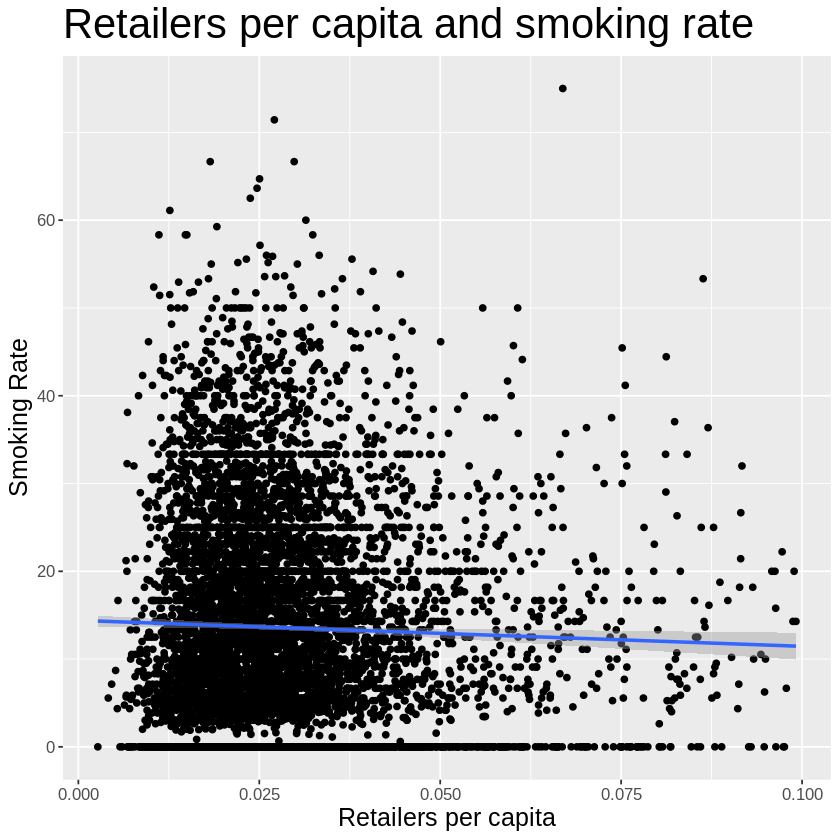

In [117]:
#Add some nice graphs to visualise our data
library(ggplot2)

ggplot(data = filter(final_data, retailer_per_capita < 0.1)) + 
    geom_point(mapping = aes(y=smoking_rate, x=retailer_per_capita)) +
    labs(title = "Retailers per capita and smoking rate", y="Smoking Rate", x="Retailers per capita") +
    theme(plot.title = element_text(size = 25),
         axis.text = element_text(size = 10),
         axis.title = element_text(size = 15)) +
     geom_smooth(mapping = aes(y=smoking_rate, x=retailer_per_capita), method='lm', formula= y~x)

In [122]:
model <- lm(smoking_rate ~ retailer_per_capita + , data=final_data)
summary(model)


Call:
lm(formula = smoking_rate ~ retailer_per_capita, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.126 -10.636  -2.547   7.807  62.239 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           14.183      0.320  44.322   <2e-16 ***
retailer_per_capita  -21.243      9.762  -2.176   0.0296 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.46 on 6971 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.0006789,	Adjusted R-squared:  0.0005355 
F-statistic: 4.736 on 1 and 6971 DF,  p-value: 0.02958


In [15]:
agg

DataZone2011Code,count
<chr>,<int>
S01006506,34
S01006507,19
S01006508,16
S01006509,11
S01006510,20
S01006511,17
S01006512,27
S01006513,19
S01006514,29


In [16]:
simd

datazone,rank_crime,rank_housing,rank_income,rank_SIMD,rank_access,rank_employment,rank_health,rank_education,quintile_health,⋯,decile_education,decile_health,vigintile_crime,vigintile_housing,vigintile_income,vigintile_SIMD,vigintile_access,vigintile_employment,vigintile_education,vigintile_health
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01006506,4664.0,3248.0,3936.0,4691,4724,3220.0,5174,5887,4,⋯,9,8,14,10,12,14,14,10,17,15
S01006507,4602.0,3486.0,4829.0,4862,2148,4481.0,5051,4384,4,⋯,7,8,14,10,14,14,7,13,13,15
S01006508,4563.5,5342.0,4460.0,5686,4200,5110.0,5942,5915,5,⋯,9,9,14,16,13,17,13,15,17,18
S01006509,5626.0,4394.5,3481.0,4332,3982,3229.0,3871,6401,3,⋯,10,6,17,13,10,13,12,10,19,12
S01006510,3885.0,3736.0,3344.0,3913,5588,3448.0,3049,4092,3,⋯,6,5,12,11,10,12,17,10,12,9
S01006511,6928.0,5924.0,5469.0,6253,4974,5346.0,5783,5410,5,⋯,8,9,20,17,16,18,15,16,16,17
S01006512,4528.0,4815.0,6264.0,5692,547,6206.0,6586,6506,5,⋯,10,10,13,14,18,17,2,18,19,19
S01006513,6928.0,6393.0,6572.0,6177,1490,5695.0,5516,6531,4,⋯,10,8,20,19,19,18,5,17,19,16
S01006514,5507.0,6868.0,6704.0,6715,1858,6658.0,6733,6847,5,⋯,10,10,16,20,20,20,6,20,20,20


In [17]:
simd <- simd %>% 
    filter(Total_population > 1000)

In [18]:
simd

Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,⋯,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
S01006514,"Cults, Bieldside and Milltimber West",Aberdeen City,1123,709,6715,97,20,10,5,⋯,2.722303,3.5173370,4.6939645,2.889620,4.0612919,7.039018,9.742910,10.002157,9.730058,14%
S01006517,"Cults, Bieldside and Milltimber West",Aberdeen City,1052,646,5772,83,17,9,5,⋯,6.506307,3.2286588,3.6641913,4.761159,8.8829315,2.994636,12.555688,12.477375,20.901678,26%
S01006524,"Cults, Bieldside and Milltimber East",Aberdeen City,1056,629,4175,60,12,6,3,⋯,6.682634,2.1015919,2.4277051,5.132514,7.8547593,2.187346,6.600771,5.694650,13.888742,0%
S01006528,Garthdee,Aberdeen City,1154,829,3834,55,11,6,3,⋯,3.054611,1.9031383,2.5051306,2.804954,3.9037427,6.699385,7.070665,9.177727,9.684287,2%
S01006535,"Braeside, Mannofield, Broomhill and Seafield East",Aberdeen City,1046,812,6734,97,20,10,5,⋯,3.117305,2.3013271,1.3800506,2.070461,3.5598844,5.036229,8.559971,4.466233,6.447160,0%
S01006536,"Braeside, Mannofield, Broomhill and Seafield East",Aberdeen City,1003,827,5634,81,17,9,5,⋯,3.900466,1.9893227,1.4447586,2.509882,2.9935813,4.421101,6.680298,4.375845,5.419446,0%
S01006542,"Braeside, Mannofield, Broomhill and Seafield North",Aberdeen City,1131,664,6751,97,20,10,5,⋯,2.613949,3.1928821,2.5475125,2.262716,7.1804570,4.979934,10.714161,7.789428,18.265335,12%
S01006544,"Braeside, Mannofield, Broomhill and Seafield North",Aberdeen City,1283,862,6937,100,20,10,5,⋯,1.988147,1.9050187,2.2065219,3.064556,4.4556022,3.426080,6.101057,10.046748,12.716225,6%
S01006545,"Braeside, Mannofield, Broomhill and Seafield North",Aberdeen City,1120,731,6594,95,19,10,5,⋯,3.057223,1.3293333,1.7222512,3.484306,4.8035657,3.937479,5.696988,6.803486,11.160009,10%


In [27]:
dim(simd)

[1] 6976   14

In [10]:
#Bonus code to illustrate how we would work with data in long format
#Recode each of the levels for the simd variable
simd$domain <- recode(simd$domain, Crime = "crime",
                          Housing = "housing",
                          Income = "income",
                          `Access To Services` = "access",
                          Employment = "employment",
                          Health = "health",
                          `Education Skills And Training` = "education")

#do the same for the categories e.g. deciles and vigintiles etc
simd$categories <- recode(simd$categories, Rank = "rank",
                          Quintile = "quintile",
                          Decile = "decile",
                          Vigintile = "vigintile")

#Reshape the simd data so that each simd level has its own variable, and check the new column names
simd <- simd %>%
    select(-Units, -date) %>%
    pivot_wider(names_from = c(categories, domain), values_from = values, names_sep="_")

In [ ]:
merged_tibble <- SIMD_data %>%
    inner_join(new_tibble, by = "datazone")

In [ ]:
new_tibble <- smoking_data %>% 
    select(datazone, `17_19`) %>%
    filter(`17_19` > 10)

In [ ]:
merged_tibble

In [ ]:
tobaccoregister <- rename(tobaccoregister, Postcode = "postcode")

merged_tibble_tob <- tobaccoregister %>%
    inner_join(postcodes, by = "Postcode")

In [ ]:
merged_tibble_tob

In [ ]:
head(tobaccoregister)

In [ ]:
tobaccoregister

In [ ]:
merged_tibble_tob_anti <- tobaccoregister %>%
    anti_join(postcodes, by = "Postcode")

In [ ]:
merged_tibble_tob_anti

In [ ]:
typeof(merged_tibble_tob_anti)

In [9]:
x <- 5.0
x <- x %>% 
    log(x) %>% 
    -2
x

[1] -1

In [7]:
log(45)

[1] 3.806662

In [10]:
x <- 5
log(x)

[1] 1.609438